In [0]:
dbutils.fs.ls("/FileStore/")

[FileInfo(path='dbfs:/FileStore/tables/', name='tables/', size=0, modificationTime=0)]

In [0]:
dbutils.fs.ls("/FileStore/tables/")

[FileInfo(path='dbfs:/FileStore/tables/BDTT_Lab_2023_24_Week7__1_.pdf', name='BDTT_Lab_2023_24_Week7__1_.pdf', size=1179007, modificationTime=1714128978000),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1709137348000),
 FileInfo(path='dbfs:/FileStore/tables/TS021_2021_2.csv', name='TS021_2021_2.csv', size=497239, modificationTime=1710953978000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations.zip', name='activations.zip', size=8411369, modificationTime=1706717421000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2021.csv', name='clinicaltrial_2021.csv', size=50359696, modificatio

In [0]:
fileroot = "clinicaltrial_2023"
import os
os.environ ['fileroot'] = fileroot

In [0]:
%sh
rm -r /tmp/$fileroot
rm /tmp/$fileroot.zip
rm /tmp/$fileroot.csv

rm: cannot remove '/tmp/clinicaltrial_2023': No such file or directory
rm: cannot remove '/tmp/clinicaltrial_2023.csv': No such file or directory


In [0]:
dbutils.fs.rm("/FileStore/tables/" + fileroot+".csv" , True)

True

In [0]:
dbutils.fs.cp("/FileStore/tables/" + fileroot + ".zip", "file:/tmp/")

True

In [0]:
%sh
unzip -d /tmp /tmp/$fileroot.zip

Archive:  /tmp/clinicaltrial_2023.zip
  inflating: /tmp/clinicaltrial_2023.csv  


In [0]:

dbutils.fs.mv("file:/tmp/" + fileroot+".csv" , "/FileStore/tables/", True )

True

In [0]:
dbutils.fs.head("/FileStore/tables/clinicaltrial_2023.csv")

[Truncated to first 65536 bytes]


'"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\r\n"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-28",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [0]:
myrdd= sc.textFile("/FileStore/tables/clinicaltrial_2023.csv")

myrdd.take(5)

['"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 '"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-28",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [0]:
# basic data cleaning
# removing the header file as it is a csv file

header1 = myrdd.first()

myrdd1 = myrdd.filter(lambda row: row != header1).map(lambda line: line.rstrip(',,')).map(lambda line: line.replace('"',''))

myrdd1.take(5)

["NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G., Depression, Psychosis, Personality Disorder, Substance Abuse)\tBEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR, OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-28",
 "NCT05992571\tOral Ketone Monoester Supplementation and Resting-state Brain Connectivity\t\tRECRUITING\tCerebrovascular Function|Cognition\tOTHER: Placebo|DIETARY_SUPPLEMENT: β-OHB\tMcMaster University\tAlzheimer's Society of Brant, Haldimand Norfolk, Hamilton Halton\t30.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: CROSSOVER|Masking: TRIPLE (PARTICIPANT, INVESTIGATOR, OUTCOMES_

In [0]:
myrdd2 = myrdd1.map(lambda line: line.split('\t'))

myrdd2.take(5)

[['NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G., Depression, Psychosis, Personality Disorder, Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR, OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28'],
 ['NCT05992571',
  'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  '',
  'RECRUITING',
  'Cerebrovascular Function|Cognition',
  'OTHER: Placebo|DIETARY_SUPPLEMENT: β-OHB',
  'McMaster University',
  "Alzheimer's Society of Brant, Haldimand Norfolk, Hamilton Halton",
  '30.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocat

In [0]:
# since there is ony two rows that are not 14 in length we could remove those rows as it won't affect the data evaluation.
myrdd3 = myrdd2.filter(lambda x: len(x) == 14)

myrdd3.take(5)

[['NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G., Depression, Psychosis, Personality Disorder, Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR, OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28'],
 ['NCT05992571',
  'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  '',
  'RECRUITING',
  'Cerebrovascular Function|Cognition',
  'OTHER: Placebo|DIETARY_SUPPLEMENT: β-OHB',
  'McMaster University',
  "Alzheimer's Society of Brant, Haldimand Norfolk, Hamilton Halton",
  '30.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocat

In [0]:
#creating DataFrame
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
mySchema = StructType ([
    StructField("Id", StringType()),
    StructField("Study Title", StringType()) ,
    StructField("Acronym", StringType()),
    StructField("Status", StringType()),
    StructField("Conditions", StringType()),
    StructField("Interventions", StringType()),
    StructField("Sponsor", StringType()),
    StructField("Collaborators", StringType()),
    StructField("Enrollment", StringType()),
    StructField("Funder Type", StringType()),
    StructField("Type", StringType()),
    StructField("Study Design", StringType()),
    StructField("Start", StringType()),
    StructField("Completion", StringType())])

clinicaltrial = spark.createDataFrame(myrdd3 , mySchema)
clinicaltrial.show(10)

+-----------+--------------------+----------+------------------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------------+--------------------+----------+----------+
|         Id|         Study Title|   Acronym|            Status|          Conditions|       Interventions|             Sponsor|       Collaborators|Enrollment|Funder Type|          Type|        Study Design|     Start|Completion|
+-----------+--------------------+----------+------------------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------------+--------------------+----------+----------+
|NCT03630471|Effectiveness of ...|     PRIDE|         COMPLETED|Mental Health Iss...|BEHAVIORAL: PRIDE...|             Sangath|Harvard Medical S...|     250.0|      OTHER|INTERVENTIONAL|Allocation: RANDO...|2018-08-20|2019-02-28|
|NCT05992571|Oral Ketone Monoe...|          |        RECRUITING|Cerebrovascular 

In [0]:
#Q1
clinicaltrial.select("Study Title").distinct().count()

481100

In [0]:
#Q2
Types=clinicaltrial.groupBy("Type").count()
types=Types.orderBy(desc("count"))
types.show(5,truncate=False)

+---------------+------+
|Type           |count |
+---------------+------+
|INTERVENTIONAL |371382|
|OBSERVATIONAL  |110221|
|EXPANDED_ACCESS|928   |
|               |889   |
+---------------+------+



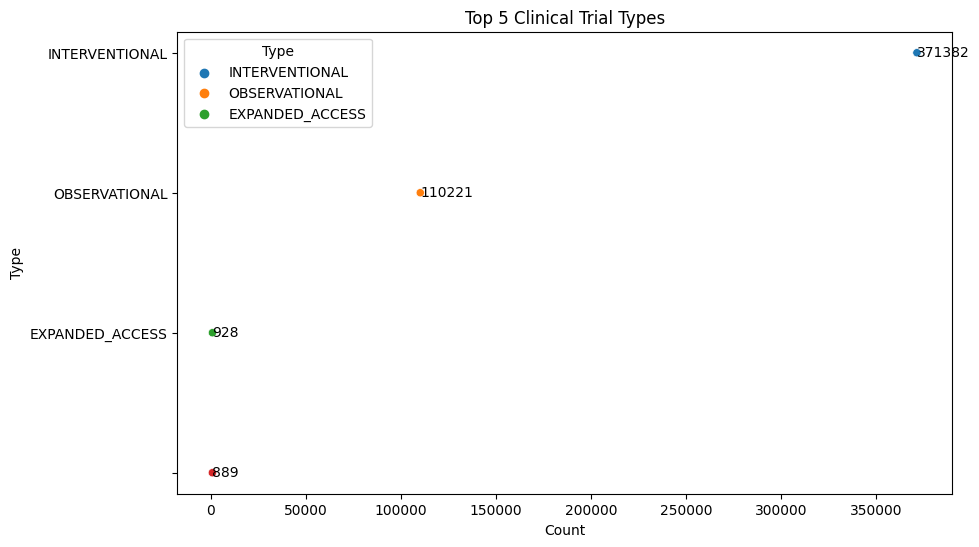

In [0]:
#ploting for Q2
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='count', y='Type', hue='Type', data=types.toPandas())
plt.xlabel('Count')
plt.ylabel('Type')
plt.title('Top 5 Clinical Trial Types')

for index, row in types.toPandas().iterrows():
    ax.text(row['count'], row['Type'], str(row['count']), ha='left', va='center')

plt.show()



In [0]:
#Q3

Conditionsdf = clinicaltrial.withColumn("conditions", split(col("conditions"), "\|"))
expanded_conditions = Conditionsdf.select(explode(Conditionsdf["conditions"]).alias("condition"))
Top_conditions = expanded_conditions.groupBy("condition").count().orderBy("count", ascending=False)
print("Top Five Conditions are:")

Top_conditions.show(5,truncate=False)

Top Five Conditions are:
+-------------+-----+
|condition    |count|
+-------------+-----+
|Healthy      |9731 |
|Breast Cancer|7502 |
|Obesity      |6549 |
|Stroke       |4072 |
|Hypertension |4020 |
+-------------+-----+
only showing top 5 rows



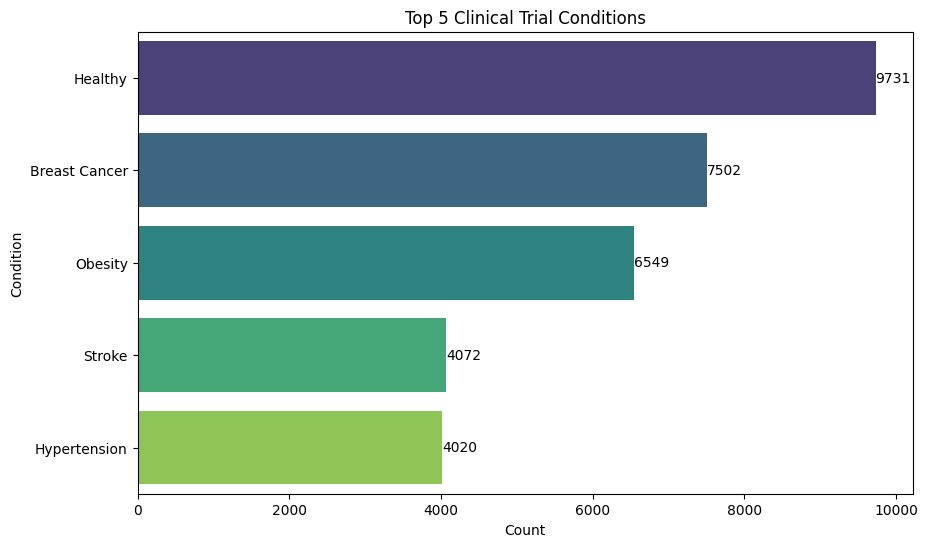

In [0]:
#ploting Q3

import seaborn as sns
import matplotlib.pyplot as plt

top_conditions_df = Top_conditions.toPandas().head(5)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='count', y='condition', data=top_conditions_df, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Condition')
plt.title('Top 5 Clinical Trial Conditions')

for index, row in top_conditions_df.iterrows():
    ax.text(row['count'], index, str(row['count']), ha='left', va='center')

plt.show()


In [0]:
# next we need to import the pharma file 

fileroot = "pharma"
import os
os.environ ['fileroot'] = fileroot

In [0]:
%sh
rm -r /tmp/$fileroot
rm /tmp/$fileroot.zip
rm /tmp/$fileroot.csv

rm: cannot remove '/tmp/pharma': No such file or directory
rm: cannot remove '/tmp/pharma.csv': No such file or directory


In [0]:
dbutils.fs.rm("/FileStore/tables/" + fileroot+".csv" , True)

True

In [0]:
dbutils.fs.cp("/FileStore/tables/" + fileroot + ".zip", "file:/tmp/")

True

In [0]:
%sh
unzip -d /tmp /tmp/$fileroot.zip

Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         


In [0]:
dbutils.fs.mv("file:/tmp/" + fileroot+".csv" , "/FileStore/tables/", True )

True

In [0]:
dbutils.fs.head("/FileStore/tables/pharma.csv")

[Truncated to first 65536 bytes]


'"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"\n"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company\'s car

In [0]:
#converting the pharma into rdd
myrdd4= sc.textFile("/FileStore/tables/pharma.csv")

myrdd4.take(5)

['"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"',
 '"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company\'s

In [0]:
#creating dataframe from pharmacy csv file
pharmacy = spark.read.options(delimiter =",").csv("/FileStore/tables/pharma.csv")
pharmacy.show(10)

+--------------------+-------------------+--------------+--------------------+--------------------+------------+------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------+--------------------+------------------+--------------------+-----+---------------+--------------------+------------------+--------------+--------+-------+-----+----------+--------------------+--------------------+------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                 _c0|                _c1|           _c2|                 _c3|                 _c4|         _c5|         _c6|                 _c7|                 _c8|                 _c9|                _c10|               _c11|         _c12|                _c13|              _c14|                _c15| _c16|           _c17|                _c18|              _c19|          _c20|    _c21|   _c22|

In [0]:
pharmacy = pharmacy.withColumn("row_id", monotonically_increasing_id())
pharmacy = pharmacy.filter(col("row_id") != 0)
pharmacy = pharmacy.drop("row_id")
#renaming the column that containing pharma companies '_c1' to 'Sponsor'
pharmacy = pharmacy.withColumnRenamed('_c1', 'Sponsor')

# Select the "Sponsor" column from the pharmacy DataFrame
parentcompany = pharmacy.select("Sponsor")
parentcompany.show(10, truncate=False)


+-------------------+
|Sponsor            |
+-------------------+
|Abbott Laboratories|
|AbbVie             |
|AbbVie             |
|Abbott Laboratories|
|Johnson & Johnson  |
|Abbott Laboratories|
|Abbott Laboratories|
|Johnson & Johnson  |
|Johnson & Johnson  |
|Abbott Laboratories|
+-------------------+
only showing top 10 rows



In [0]:
#selecting Sponser table from clinical trial

from pyspark.sql.functions import regexp_replace
df_Sponcercleaned = clinicaltrial.withColumn("Sponsor", regexp_replace("Sponsor", '"', '')).select("Sponsor")
df_Sponcercleaned.show(10, truncate=False)

+---------------------------------------+
|Sponsor                                |
+---------------------------------------+
|Sangath                                |
|McMaster University                    |
|Melbourne Health                       |
|Assistance Publique - Hôpitaux de Paris|
|Istituto Auxologico Italiano           |
|University of Oregon                   |
|Medical University of South Carolina   |
|Johns Hopkins University               |
|University of Manitoba                 |
|M.D. Anderson Cancer Center            |
+---------------------------------------+
only showing top 10 rows



In [0]:
#Q4

non_pharma_sponsor_df= df_Sponcercleaned.join(parentcompany, "Sponsor", "left_outer").filter( parentcompany["Sponsor"].isNull())
non_pharma_sponsor_df = non_pharma_sponsor_df.groupBy("Sponsor").count().orderBy("count", ascending= False)

non_pharma_sponsor_df.show(10, truncate= False)



+-------------------------------------------------------------+-----+
|Sponsor                                                      |count|
+-------------------------------------------------------------+-----+
|National Cancer Institute (NCI)                              |3410 |
|Assiut University                                            |3335 |
|Cairo University                                             |3023 |
|Assistance Publique - Hôpitaux de Paris                      |2951 |
|Mayo Clinic                                                  |2766 |
|M.D. Anderson Cancer Center                                  |2702 |
|Novartis Pharmaceuticals                                     |2393 |
|National Institute of Allergy and Infectious Diseases (NIAID)|2340 |
|Massachusetts General Hospital                               |2263 |
|National Taiwan University Hospital                          |2181 |
+-------------------------------------------------------------+-----+
only showing top 10 

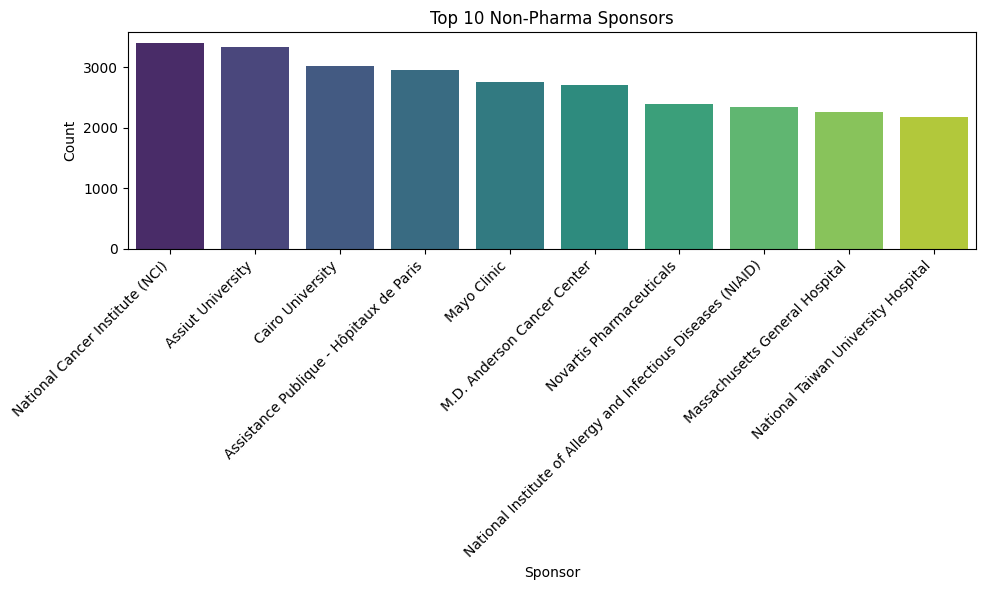

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
non_pharma_sponsor_pd = non_pharma_sponsor_df.toPandas().head(10)
sponsors = non_pharma_sponsor_pd['Sponsor']
counts = non_pharma_sponsor_pd['count']
plt.figure(figsize=(10, 6))
sns.barplot(x=sponsors, y=counts, palette='viridis')
plt.title('Top 10 Non-Pharma Sponsors')
plt.xlabel('Sponsor')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display plot
plt.show()


In [0]:
#Q5
MonthDF=clinicaltrial.withColumn("month", substring(col("Completion"), 6, 2)).filter(col("Completion").substr(1,4)== "2023").filter(col("Status")=='COMPLETED').groupBy("month").count().orderBy("month")
MonthDF.show(15)

+-----+-----+
|month|count|
+-----+-----+
|   01| 1494|
|   02| 1272|
|   03| 1552|
|   04| 1324|
|   05| 1415|
|   06| 1619|
|   07| 1360|
|   08| 1230|
|   09| 1152|
|   10| 1058|
|   11|  909|
|   12| 1082|
+-----+-----+



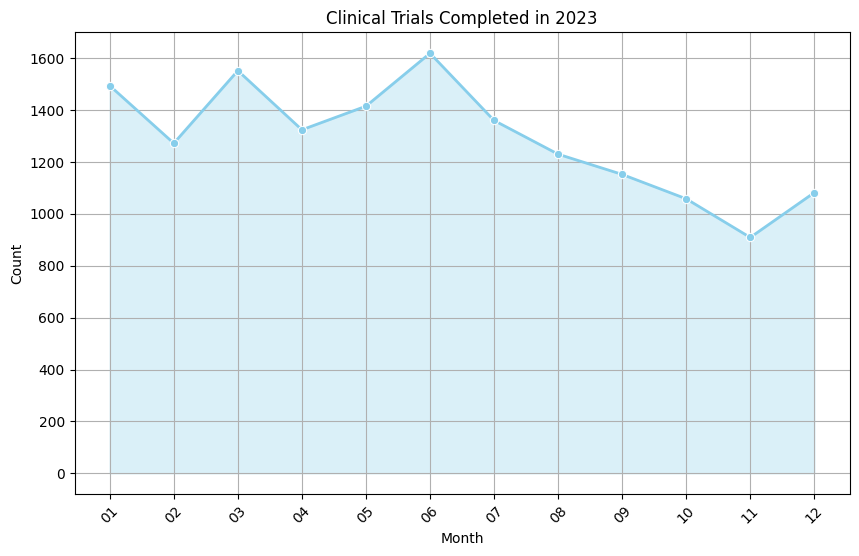

In [0]:
#ploting Q5
import seaborn as sns
import matplotlib.pyplot as plt

month_df_pd = MonthDF.toPandas()
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='count', data=month_df_pd, color='skyblue', marker='o', linewidth=2)
plt.fill_between(month_df_pd['month'], month_df_pd['count'], color='skyblue', alpha=0.3)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Clinical Trials Completed in 2023')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [0]:
#further analysis. here we are trying to find the duration of each studyies(in days).
from pyspark.sql.functions import datediff
df = clinicaltrial.withColumn("Duration", datediff(clinicaltrial["Completion"], clinicaltrial["Start"]))
duration_df = df.select("Id", "Start", "Completion", "Duration").limit(5).toPandas()
print("Duration of Studies (DataFrame):")
print(duration_df)


Duration of Studies (DataFrame):
            Id       Start  Completion  Duration
0  NCT03630471  2018-08-20  2019-02-28       192
1  NCT05992571  2023-10-25     2024-08       281
2  NCT00237471     2005-10     2006-05       212
3  NCT03820271  2020-10-01  2023-10-01      1095
4  NCT06229171  2024-10-01  2026-04-01       547
